## Straight line (dataset - 1)


We are given a data corresponding to a straight line with noise added, and we have to find best straight line fitting the data. how do we classify a straight line fit to be better than the other straight line fit. we define a cost function and the straight line which has a lesser cost function value is a better fit. now we have to find the straight line which has the minimum cost value

the cost function is defined as mean square error function (MSE) where

$$
MSE = {\sum_1^N( yPredicted_i - yExpected_i)^2 \over 2N}
$$
where N = number of samples in the dataset



In [218]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

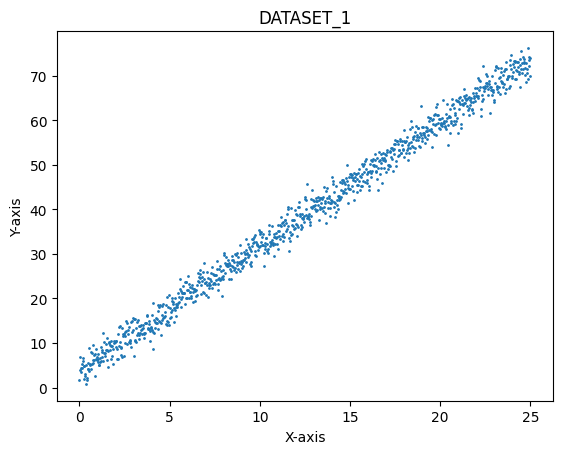

In [219]:
#picking up the data from the given dataset and plotting it
#a corresponds to the x axis values
#b corresponds to the y axis values
a = []
b = []
with open ('dataset1.txt') as file_lines:
    for line in file_lines:
        a.append(line.split()[0])
        b.append(line.split()[1])
a = [float(a[i]) for i in range (0,len(a))]
b = [float(b[i]) for i in range(0,len(b))]
plt.plot(a,b,'o',markersize=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("DATASET_1")
plt.show()

In [220]:
#estimating the slope and intecept of the line from least square method.
M = np.column_stack([a, np.ones(len(a))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, b, rcond=None)
print(f"The estimated equation is {p1} * a + {p2}")

The estimated equation is 2.791124245414921 * a + 3.848800101430749


In the above cell we are just finding p1 and p2 such that the cost function $$ \sum_1^N ((p_1 a_i + p_2) - b_i)^2
$$ achives least possible value

# Error bars
Error bars often represent standard deviation of uncertainty, standard error, or a particular confidence interval (e.g., a 95% interval). These quantities are not the same and so the measure selected should be stated explicitly, here we use standard deviation of difference between expected value and predicted value

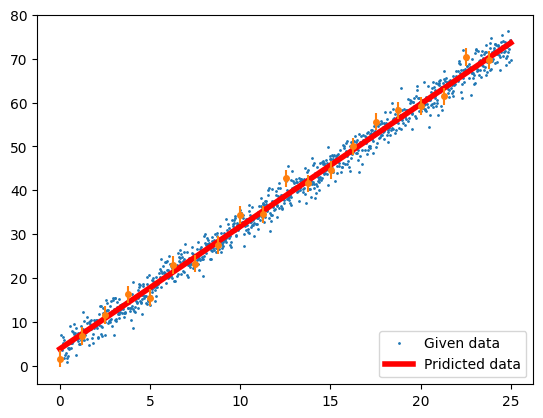

In [223]:
def stline(x, m, c):
    return m * x + c
v_stline = np.vectorize(stline)
b_pridiction = v_stline(a, p1, p2)
plt.plot(a,b,'o',a, b_pridiction,'-r',markersize = '1',linewidth = '4')
plt.legend(["Given data", "Pridicted data"], loc ="lower right")
#error bars
plt.errorbar(a[::50],b[::50],np.std([b[i] - b_pridiction[i] for i in range(0,len(b))]),fmt = 'o',markersize = '4')
plt.show()

In [226]:
(cf_p1, cf_p2), pcov = curve_fit(stline,a,b)
print(f"Estimated function: {cf_p1}t + {cf_p2}")

Estimated function: 2.7911242472208153t + 3.848800089588013


In [227]:
def cost(m,c,a,b) :
    return ((m*a + c - b)**2)
cost = np.vectorize(cost)

In [228]:
#comparing accuracy of fit
print(np.sum(cost(p1,p2,a,b)))
print(np.sum(cost(cf_p1,cf_p2,a,b)))

3983.412380573276
3983.412380573275


In [229]:
#comparing the time taken
%timeit curve_fit(stline,a,b)
%timeit np.linalg.lstsq(np.column_stack([a, np.ones(len(a))]), b, rcond=None)

137 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
64.2 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Curve_fit has a slightly better accuracy but comes at a cost of double the time compared to lstsq. Since lstsq is specificaly ment for linear curve fit where as curve_fit is ment for any genral curve and hence curve_fit takes up more time compared to lstsq

## Fourier series

Any periodic sequence can be expressed as a sum of harmonic waves of some fundamental frequency.

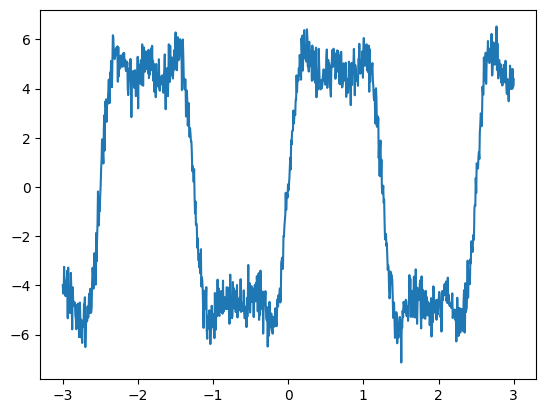

In [231]:
x,y = [], []
with open("dataset2.txt", 'r') as data:
    for line in data:
         x.append(float(line.split()[0]))
         y.append(float(line.split()[1]))

plt.plot(x, y)
plt.show()

the information is given (can also be deduced from the graph ploted) that data corresponds to a sum of several sine waves that are harmonics of some fundamental frequency.


In [232]:
#to find the frequency 
for i in range(1, len(x)) :
    if(abs(y[i])<0.1) :
        print(i,x[i], y[i])

84 -2.4954954954954953 0.07248855973903644
707 1.2462462462462458 0.011933644563926121
710 1.2642642642642645 0.05397213723524075


In [233]:
#time period deduced from graph along with the data from above cell will be 
time_period = (x[710] - x[84]) * (2/3)
print(time_period)
frequency = 1/time_period
omega = 2 * np.pi * frequency 

2.5065065065065064


Now we have to find the coefficients of fourier series from the formulae 
[you can find the formulae here](https://cdn1.byjus.com/wp-content/uploads/2020/11/Fourier-series-example-sol.png)
we approximate the integral to be a summation.

In [234]:
#finding the constant term in forier series 
integral =0
dx = x[1] - x[0]  #x[i+1] - x[i] is constant throughout x array
for i in range (0,int(time_period/dx)) :
    integral += y[i]*dx
    
a0 = integral / (time_period/2)    
print(a0)

-0.08791835756632337


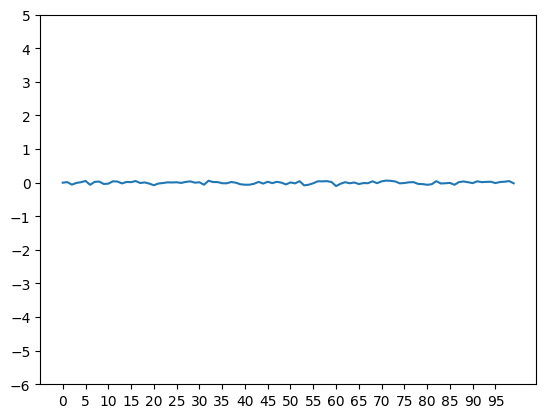

In [235]:
#finding ak
ak = []
ak.append(0)
integral = 0
for k in range(1, 100):
    for i in range(0,round(time_period/dx)):
       integral += y[i]*(dx)*np.cos(k*4*(np.pi/5)*x[i])
    ak.append(integral/(time_period/2))
    integral=0
plt.plot(ak)
plt.xticks(np.arange(0,100,5))
plt.yticks(np.arange(-6,6,1))
plt.show()

As we observe ak coefficients are close to zero.

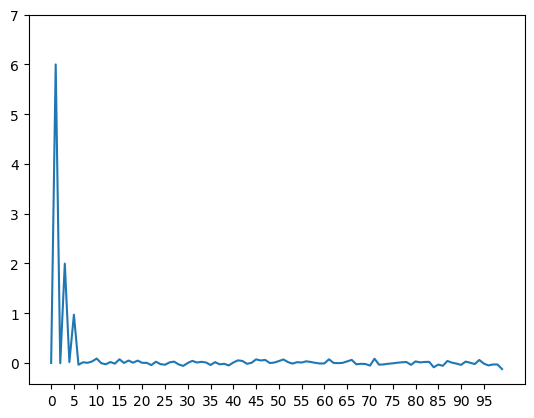

In [236]:
#finding bk
bk = []
bk.append(0)
integral = 0
for k in range(1, 100):
    for i in range(0,round(time_period/dx)) :
       integral += y[i]*(dx)*np.sin(k*4*(np.pi/5)*x[i])
    bk.append(integral/(time_period/2))
    integral=0
plt.plot(bk)
plt.xticks(np.arange(0,100,5))
plt.yticks(np.arange(0,8,1))
plt.show()

we can see that bk for k >=7 is approximately tending to zero. So the given function roughly contains only 6 harmonics

In [238]:
def inverse_fourier(x,ak,bk,a0, omega):
    sum = 0
    for k in range(0, 6):
        sum += ak[k]*np.cos((k)*omega*x)
        sum += bk[k]*np.sin((k)*omega*x)
    
    sum += a0/2
    return sum

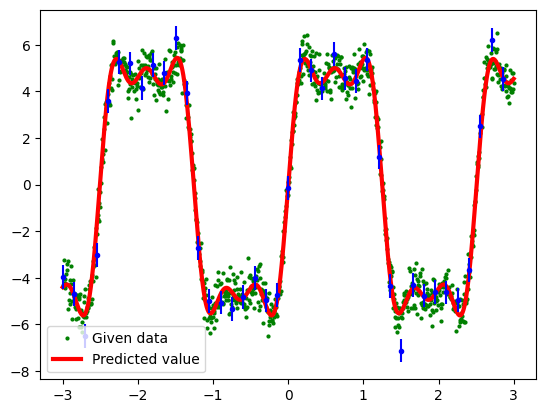

In [240]:
sum = []
for time in x:
    sum.append(inverse_fourier(time, ak, bk, a0, omega))

plt.plot(x,y,'og',x,sum,'-r',markersize = '2',linewidth = '3')
plt.legend(["Given data", "Predicted value"], loc ="lower left")
plt.errorbar(x[::25],y[::25],np.std([y[i] - sum[i] for i in range(0,len(y))]),fmt = 'ob',markersize = '3')
plt.show()

## Planks constant

In [241]:
#picking up the data from data set
freq = []
radiance = []
with open ('dataset3.txt') as file_lines:
    for line in file_lines:
        freq.append(line.split()[0])
        radiance.append(line.split()[1])
freq = [np.float64(freq[i]) for i in range (0,len(freq))]
radiance = [np.float64(radiance[i]) for i in range(0,len(radiance))]

Now we are given many data points for spectral radiance of a body vs frequency, now we have to find the parameters h and temperature such that the radiance_pridicted curve ( calculated from the frequency and the pridicted h and temperature) is the best fit curve for the given data 

In [242]:
#from planks formulae
def plank_function(f,h,t):
    c = np.float64(3e8)
    k = np.float64(1.38e-23)
    temporary = h*f/(k*t)
    return 2*h*(f**3)/((c**2)*(np.exp(np.float64(temporary)) - 1))

#for initial guess assume temperature to be around 300k and pick any one data point to 
#find the initial guess for planks constant
(h,t), pcov = curve_fit(plank_function, freq, radiance,p0 = [1e-34,300])
print(f'The pridicted value to planks costant in {h}, and the pridicted value for temperature is {t} kelvin')

The pridicted value to planks costant in 6.643229746294101e-34, and the pridicted value for temperature is 6011.361513697889 kelvin


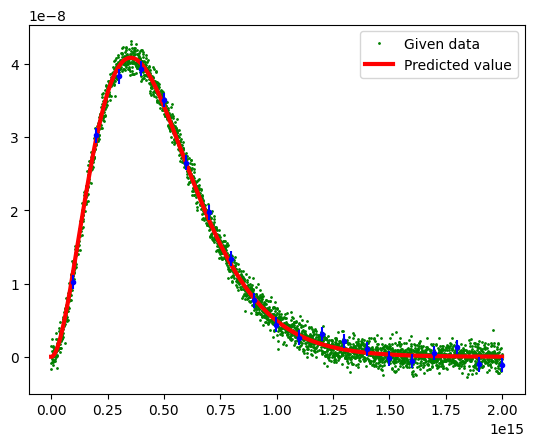

In [245]:
radiance_pridicted = [plank_function(freq[i],h,t) for i in range(0,len(freq))]
plt.plot(freq,radiance,'og',freq,radiance_pridicted,'-r',markersize = '1',linewidth = '3')
plt.legend(["Given data","Predicted value",], loc ="upper right")
plt.errorbar(freq[::150],radiance[::150],np.std([radiance[i] - radiance_pridicted[i] for i in range(0,len(radiance))]),fmt = 'ob',markersize = '3')
plt.show()

## Dataset - 4



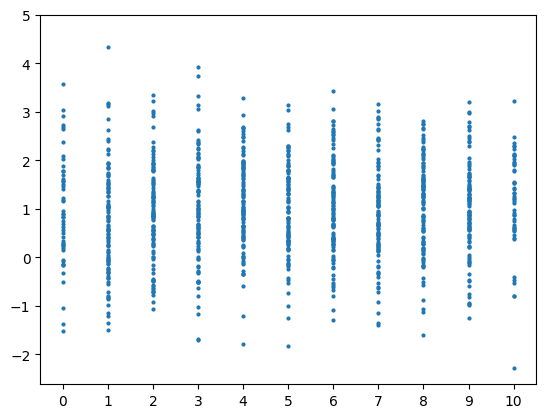

In [246]:
x = []
y = []
with open ('dataset4.txt') as f :
    for line in f :
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
plt.plot(x,y,'o',markersize = '2')
plt.xticks(np.arange(int(min(x)),max(x) + 1, 1))
plt.yticks(np.arange(int(min(y)),max(y) + 1, 1))
plt.show()

The information that can be deduced from having different y values for the same x values means that the slope of the actual function is very high at x = 0,1,2,3 .. 10 so the error of measerment at integral points is high (f(0.001) and f(0) will have large difference) so the information we have is the slope at these integral points is high. One such function is a sine wave. Sine wave with high amplitude and high frequency will have a high derivative value $$ d/dx(a*sin(2*pi*f*t))  \text{  directly proportional to  }   a*f$$

But here we fix the time period to be 2 seconds (from graph) hence we should keep the amplitude high (higher than the highest y value in datasheet) to get the desired curve

In [247]:
def function(x,c1,c2,c3):
    return c1 + c2*np.sin(c3*x)

In [248]:
(c1,c2,c3), pcov = curve_fit(function, x, y,p0 = [0,10,np.pi])
print(c1,c2,c3)

0.9912205408401306 9.937800584590397 3.142322715773865


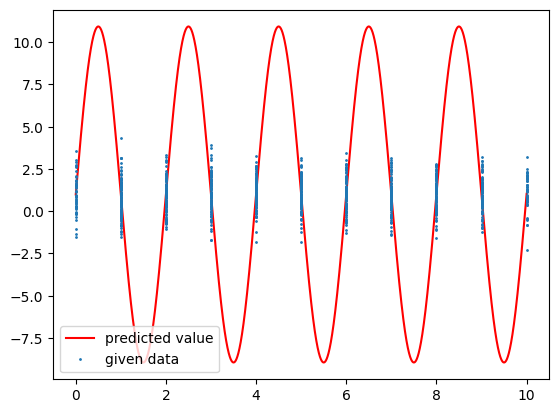

In [249]:
function = np.vectorize(function)
pri = function(np.arange(x[0],x[-1],1e-3),c1,c2,c3)
plt.plot(np.arange(x[0],x[-1],1e-3),pri,'-r',x,y,'o',markersize = '1')
plt.legend(["predicted value", "given data"], loc ="lower left")
plt.show()

We can also add more sine wave

0.8949579673799629 20.0 3.142293845431777 13.728648935385827


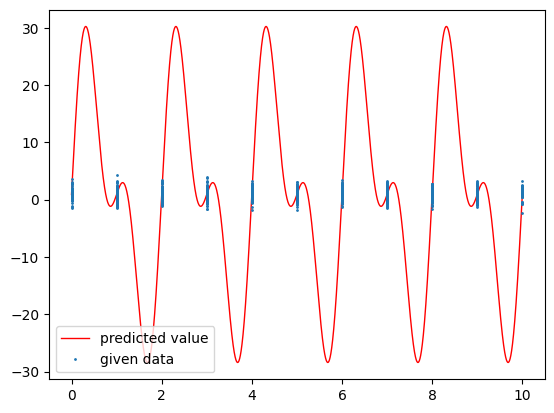

In [250]:
def function2(x,c1,c,c3,c4) :
    return c1 + c2*(np.sin(c3*x)) + c4*(np.sin(2*c3*x))

(c1,c2,c3,c4), pcov = curve_fit(function2, x, y,p0 = [0,20,np.pi,10])
print(c1,c2,c3,c4)
function2 = np.vectorize(function2)
pri = function2(np.arange(x[0],x[-1],1e-3),c1,c2,c3,c4)
plt.plot(np.arange(x[0],x[-1],1e-3),pri,'-r',x,y,'o',linewidth = '1',markersize = '1')
plt.legend(["predicted value", "given data"], loc ="lower left")

plt.show()